# <center>Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pre_processing_funcs as pre

In [4]:
df = pd.read_csv("data/half_cleaned.csv")
df.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,...,Department,Video Store,Florist,Bar For Salad,Coffee Bar,Ready Food,Gross Weight,Net Weight,Package Weight,Min. Person Yearly Income
0,Dimes Off,Deluxe,8760000.0,4292400.0,True,2842.23,2037.64,481.98,323.00,602.7575,...,Household,1,1,1,1,1,28.1997,26.6008,1.5990,10000.0
1,Budget Bargains,Supermarket,6360000.0,1971600.0,False,2814.95,2049.72,457.36,NaN,708.6650,...,Snack Foods,0,0,0,0,0,16.5710,14.9720,1.5990,50000.0
2,Shelf Emptiers,Supermarket,10860000.0,4452600.0,True,2192.32,1322.21,523.32,348.85,564.2647,...,Periodicals,0,1,0,0,0,28.6358,27.1822,1.4536,30000.0
3,Savings Galore,NaN,1980000.0,673200.0,True,1974.73,NaN,440.92,293.95,724.5119,...,Dairy,0,0,0,1,0,14.2161,11.2944,2.9217,30000.0
4,Sale Winners,Deluxe,11560000.0,4970800.0,False,2862.30,1872.19,593.93,395.95,519.7574,...,Produce,1,1,1,1,1,12.6172,9.7100,2.9072,50000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38862 entries, 0 to 38861
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Promotion Name             33034 non-null  object 
 1   Store Kind                 33053 non-null  object 
 2   Store Sales                38847 non-null  float64
 3   Store Cost                 38855 non-null  float64
 4   Is Recyclable?             38862 non-null  bool   
 5   Store Area                 35296 non-null  float64
 6   Grocery Area               35255 non-null  float64
 7   Frozen Area                35309 non-null  float64
 8   Meat Area                  35313 non-null  float64
 9   Cost                       38831 non-null  float64
 10  Marriage                   38862 non-null  object 
 11  Gender                     38862 non-null  object 
 12  Children                   38862 non-null  int64  
 13  Degree                     38862 non-null  obj

In [6]:
df.isnull().sum()

Promotion Name               5828
Store Kind                   5809
Store Sales                    15
Store Cost                      7
Is Recyclable?                  0
Store Area                   3566
Grocery Area                 3607
Frozen Area                  3553
Meat Area                    3549
Cost                           31
Marriage                        0
Gender                          0
Children                        0
Degree                          0
Work                            0
Store Code                      0
Country ISO2                    0
Order Brand                     2
Order                           2
Department                      2
Video Store                     0
Florist                         0
Bar For Salad                   0
Coffee Bar                      0
Ready Food                      0
Gross Weight                 2917
Net Weight                   2893
Package Weight               5366
Min. Person Yearly Income       8
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Sales,38847.0,6.532023e+06,3.464866e+06,510000.0000,3.800000e+06,5.920000e+06,8.670000e+06,1.990000e+07
Store Cost,38855.0,2.612793e+06,1.450158e+06,163200.0000,1.495050e+06,2.376000e+06,3.478000e+06,9.726500e+06
Store Area,35296.0,2.597994e+03,5.287963e+02,1882.7000,2.189410e+03,2.572860e+03,2.863823e+03,7.857550e+03
Grocery Area,35255.0,1.775510e+03,3.712983e+02,1233.0800,1.507545e+03,1.734500e+03,2.052610e+03,8.103200e+03
Frozen Area,35309.0,4.935420e+02,1.459712e+02,227.8000,4.409200e+02,4.702700e+02,5.342900e+02,1.783640e+03
Meat Area,35313.0,3.289419e+02,9.712062e+01,149.9000,2.932700e+02,3.135500e+02,3.561900e+02,5.707400e+02
Cost,38831.0,5.192246e+02,1.568752e+02,265.6317,3.642695e+02,5.152596e+02,6.622226e+02,7.831925e+02
Children,38862.0,2.839946e+00,1.289001e+00,1.0000,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Video Store,38862.0,3.554887e-01,4.786673e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Florist,38862.0,5.638413e-01,4.959139e-01,0.0000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# df.select_dtypes(float).hist(bins=50, figsize=(14, 12));

In [7]:
# df = pre.fill_nulls(df)
# df.select_dtypes(float).hist(bins=50, figsize=(14, 12));

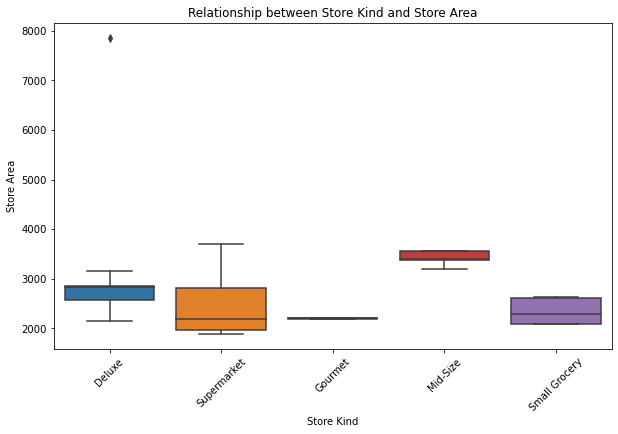

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store Kind', y='Store Area', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Store Kind')
plt.ylabel('Store Area')
plt.title('Relationship between Store Kind and Store Area')
plt.show()

In [ ]:
def map_store_kind(store_area):
    q1_grocery = df[df["Store Kind"] == "Small Grocery"]["Store Area"].describe()[4]
    q3_grocery = df[df["Store Kind"] == "Small Grocery"]["Store Area"].describe()[6]
    
    q1_mid = df[df["Store Kind"] == "Mid-Size"]["Store Area"].describe()[4]
    q3_mid = df[df["Store Kind"] == "Mid-Size"]["Store Area"].describe()[6]
    
    q1_deluxe = df[df["Store Kind"] == "Deluxe"]["Store Area"].describe()[4]
    q3_deluxe = df[df["Store Kind"] == "Deluxe"]["Store Area"].describe()[6]
    
    q1_sm = df[df["Store Kind"] == "Supermarket"]["Store Area"].describe()[4]
    q3_sm = df[df["Store Kind"] == "Supermarket"]["Store Area"].describe()[6]
    
    q1_gourmet = df[df["Store Kind"] == "Gourmet"]["Store Area"].describe()[4]
    q3_gourmet = df[df["Store Kind"] == "Gourmet"]["Store Area"].describe()[6]
    
    if q1_grocery <= store_area >= q3_grocery:
        return 'Small Grocery'
    elif q1_mid <= store_area >= q3_mid:
        return 'Mid-Size'
    elif q1_deluxe <= store_area >= q3_deluxe:
        return 'Deluxe'
    elif q1_sm <= store_area >= q3_sm:
        return 'Supermarket'
    elif q1_gourmet <= store_area >= q3_gourmet:
        return 'Gourmet'

In [ ]:
df['Store Kind'].fillna(df['Store Area'].apply(map_store_kind), inplace=True)

In [15]:
df.select_dtypes([float]).isna().sum().index

Index(['Store Sales', 'Store Cost', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Min. Person Yearly Income'],
      dtype='object')

In [11]:
df.select_dtypes([float]).isna().any()

Store Sales                  True
Store Cost                   True
Store Area                   True
Grocery Area                 True
Frozen Area                  True
Meat Area                    True
Cost                         True
Gross Weight                 True
Net Weight                   True
Package Weight               True
Min. Person Yearly Income    True
dtype: bool

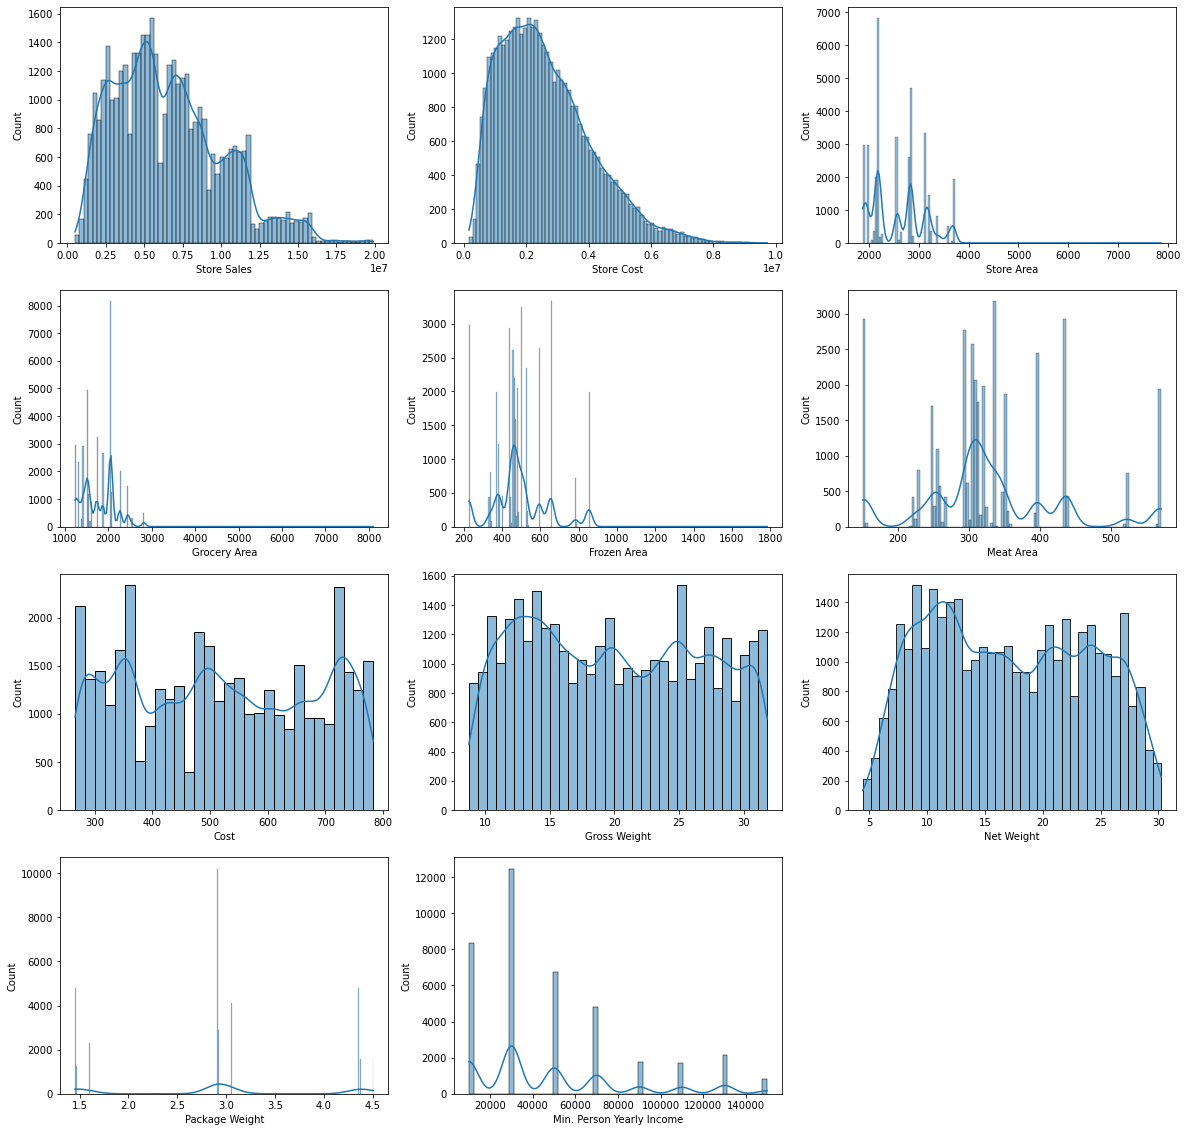

In [18]:
nullCols = ['Store Sales', 'Store Cost', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Min. Person Yearly Income']

plt.figure(figsize=(20,20))

for i, col in enumerate(nullCols):

        ax = plt.subplot(4, 3, i+1)

        sns.histplot(df[col] , ax=ax , kde=True)

        plt.xlabel(col)

plt.show()

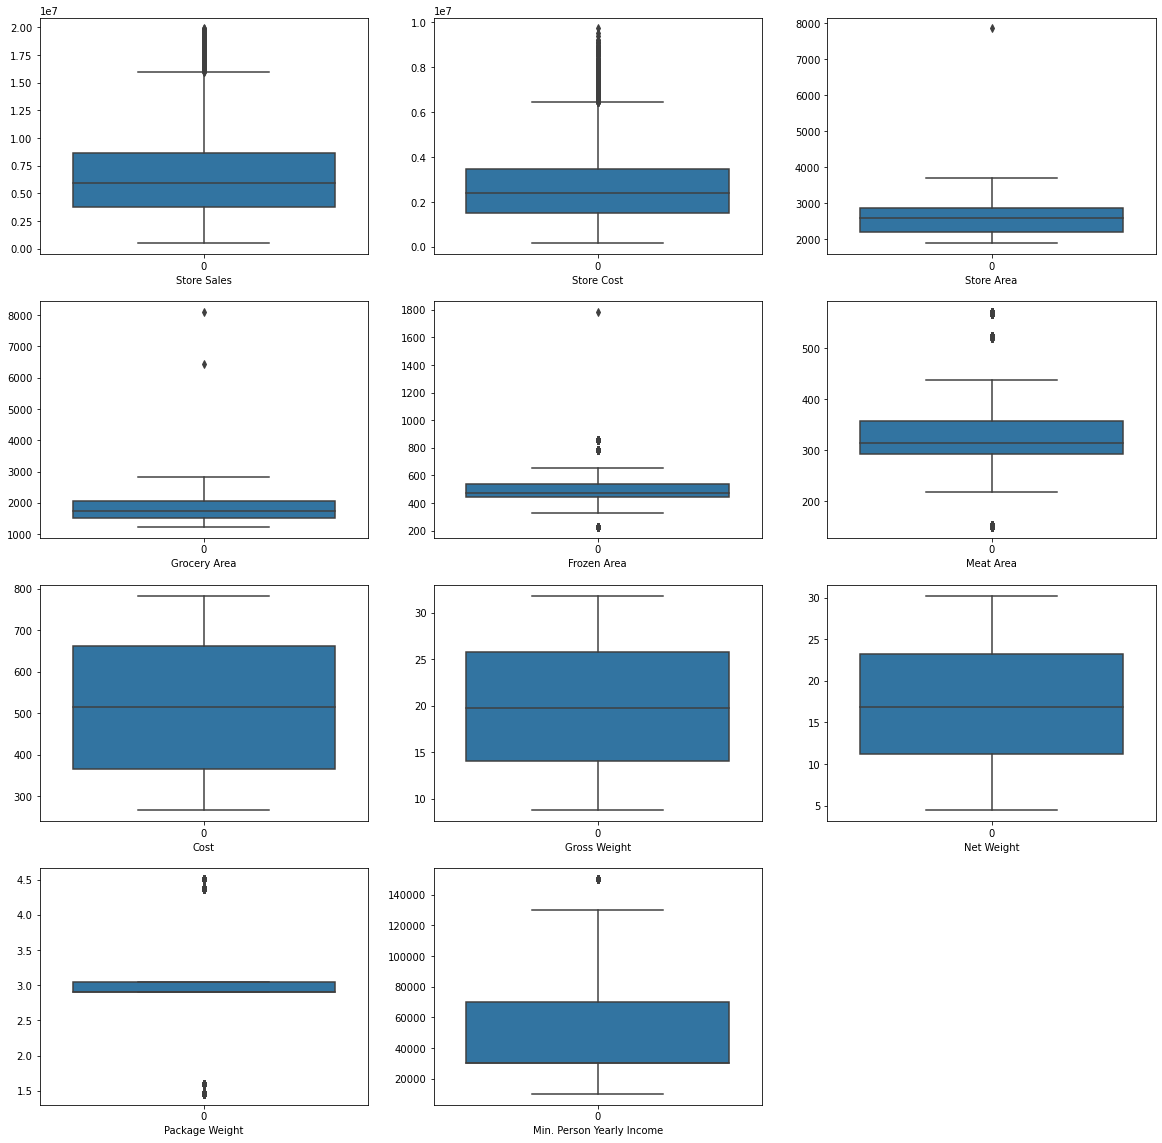

In [20]:
plt.figure(figsize=(20,20))

for i, col in enumerate(nullCols):

        ax = plt.subplot(4, 3, i+1)

        sns.boxplot(data=df[col] , ax=ax)

        plt.xlabel(col)

plt.show()

In [21]:
numcols = df.select_dtypes("number").columns
kurtosisDF = pd.DataFrame(df[numcols].kurtosis())
kurtosisDF

,0
Store Sales,0.051901
Store Cost,0.503359
Store Area,-0.659806
Grocery Area,2.507719
Frozen Area,0.780983
Meat Area,0.624266
Cost,-1.265014
Children,-1.180930
Video Store,-1.635464
Florist,-1.933802


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

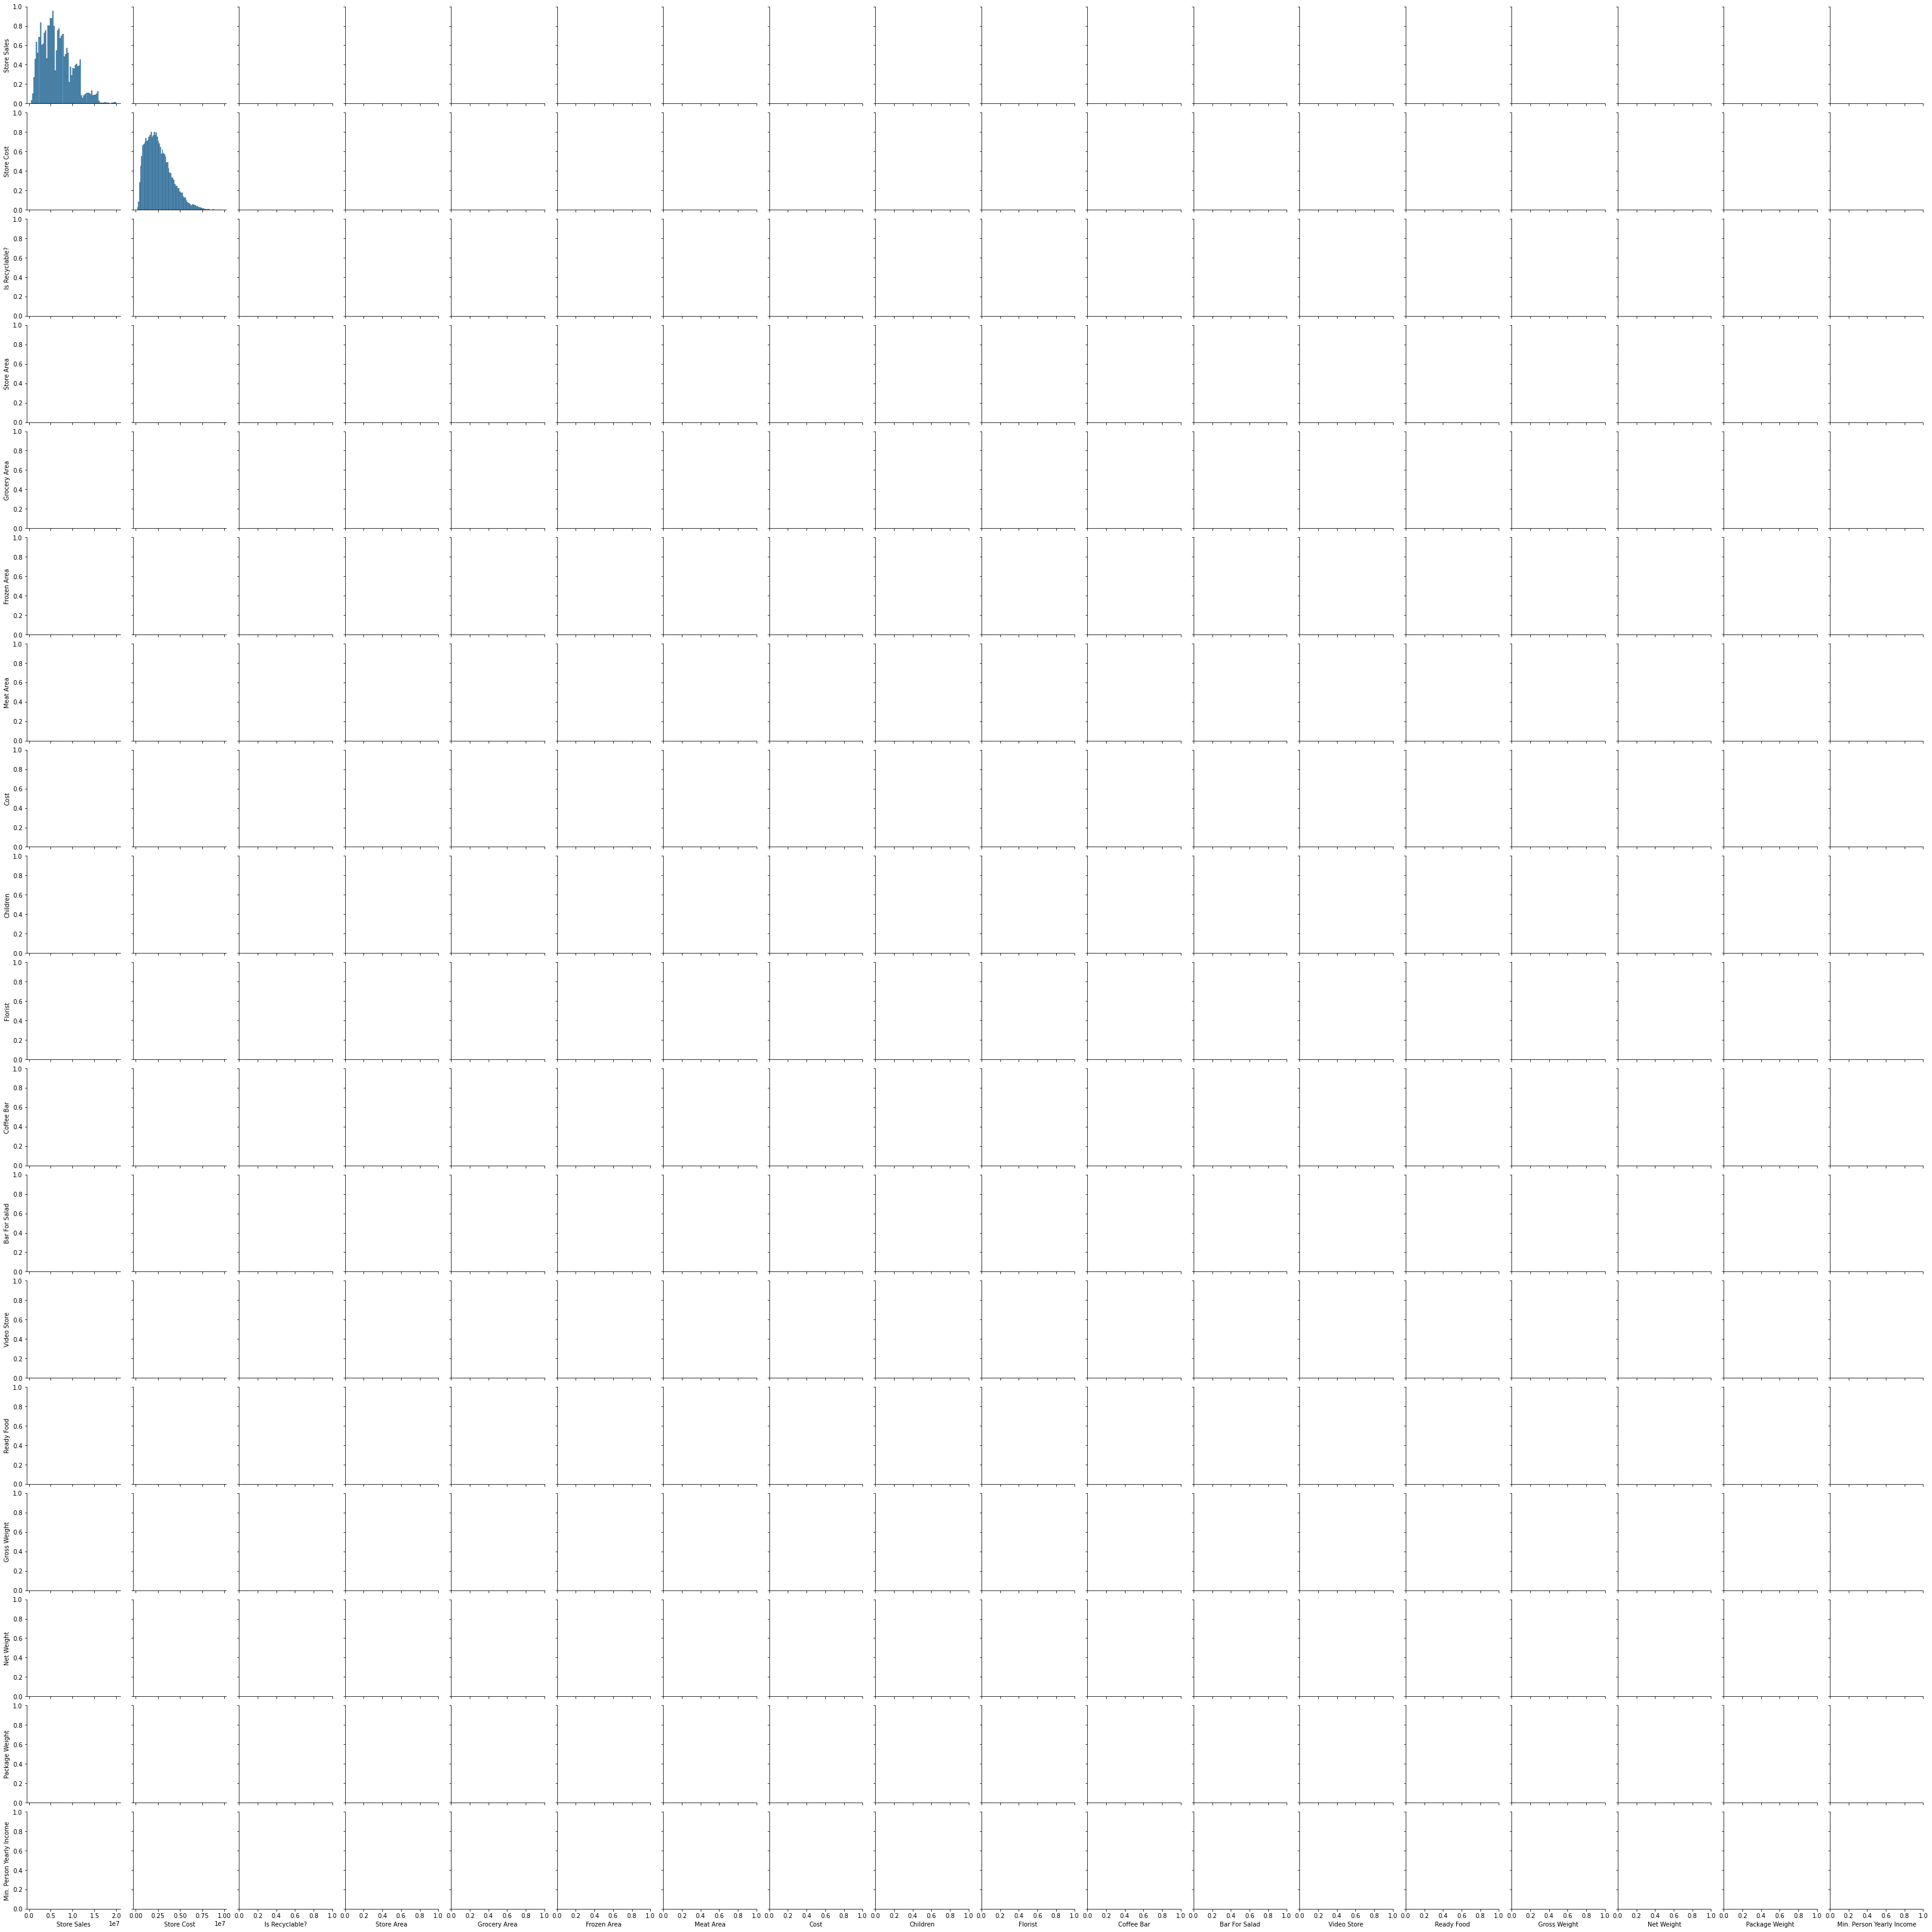

In [10]:
sns.pairplot(data=df.reset_index())
plt.show()

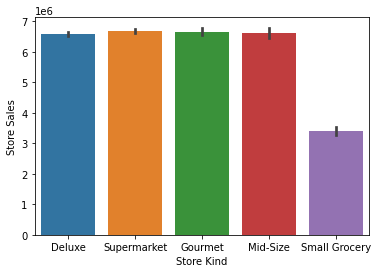

In [8]:
sns.barplot(x=df['Store Kind'], y=df['Store Sales'])
plt.xticks()
plt.show()

ValueError: num must be an integer with 1 <= num <= 4, not 5

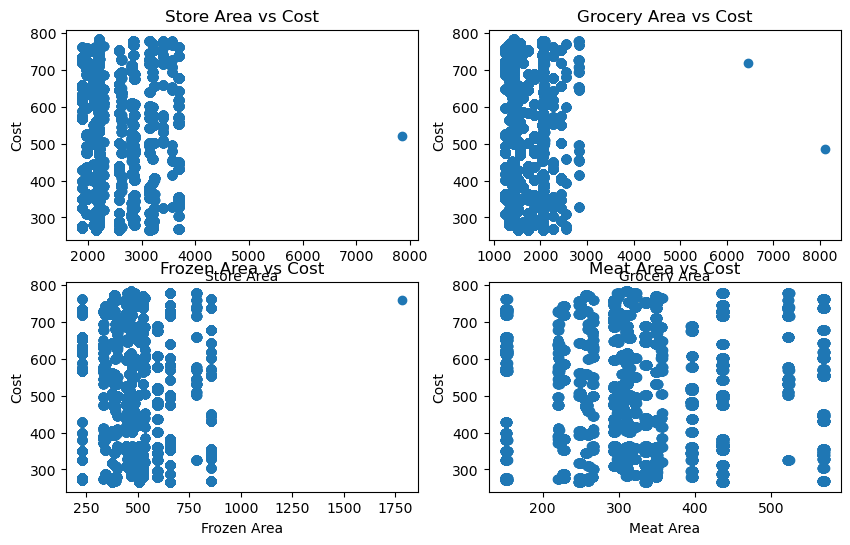

In [64]:
# Create scatter plots
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.scatter(df["Store Area"], df["Cost"])
plt.xlabel("Store Area")
plt.ylabel("Cost")
plt.title("Store Area vs Cost")

plt.subplot(222)
plt.scatter(df["Grocery Area"], df["Cost"])
plt.xlabel("Grocery Area")
plt.ylabel("Cost")
plt.title("Grocery Area vs Cost")

plt.subplot(223)
plt.scatter(df["Frozen Area"], df["Cost"])
plt.xlabel("Frozen Area")
plt.ylabel("Cost")
plt.title("Frozen Area vs Cost")

plt.subplot(224)
plt.scatter(df["Meat Area"], df["Cost"])
plt.xlabel("Meat Area")
plt.ylabel("Cost")
plt.title("Meat Area vs Cost")

plt.subplot(225)
plt.scatter(df["Gross Weight"], df["Cost"])
plt.xlabel("Gross Weight")
plt.ylabel("Cost")
plt.title("Gross Weight vs Cost")

plt.subplot(226)
plt.scatter(df["Net Weight"], df["Cost"])
plt.xlabel("Net Weight")
plt.ylabel("Cost")
plt.title("Net Weight vs Cost")

plt.subplot(227)
plt.scatter(df["Package Weight"], df["Cost"])
plt.xlabel("Package Weight")
plt.ylabel("Cost")
plt.title("Package Weight vs Cost")

plt.subplot(228)
plt.scatter(df["Min. Person Yearly Income"], df["Cost"])
plt.xlabel("Min. Person Yearly Income")
plt.ylabel("Cost")
plt.title("Min. Person Yearly Income vs Cost")

plt.tight_layout()
plt.show()


<Axes: >

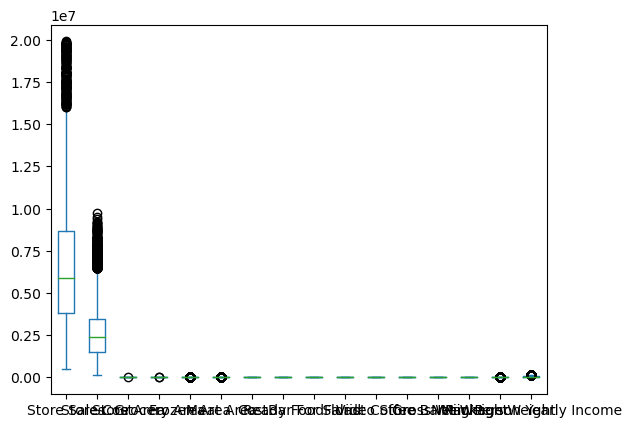

In [66]:
df.plot( kind = 'box' )

In [ ]:
df.value_counts().plot(x = 'Children' , y = 'Cost' ,  kind = 'bar' )

<Axes: xlabel='id,Place Code,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Marriage,Gender,Children,Degree,Work,Oreder Brand,Product,Department,Ready Food,Bar For Salad,Florist,Video Store,Coffee Bar,Gross Weight,Net Weight,Package Weight,Min. Person Yearly Income'>